In [2]:
import cv2
import numpy as np
from skimage.color import rgb2lab, deltaE_cie76
import matplotlib.pyplot as plt

In [3]:
def extract_color_using_dist(img_bgr, color_name):
    """This function extracts the color from the image using
    distance based approach.

    Args:
      img_bgr (numpy.ndarray): The image in the form of numpy array.
      color_name (str): The name of the color to be extracted.
      save_as (str): The path where the output image will be saved.

    Returns:
      numpy.ndarray: The image having extracted color as numpy array.
    """

    if color_name == "red":
        # reversing pixel values to convert red color into blue
        img_bgr = img_bgr[..., ::-1]

    ## extracting blue pixels
    # converting the target blue pixel from which the distance is to be calculated
    # into lab color space
    blue_rgb = np.uint8(np.asarray([[[0, 0, 255]]]))
    blue_lab = rgb2lab(blue_rgb)

    # converting the original image to lab color space
    img_rgb = img_bgr[..., ::-1]
    img_lab = rgb2lab(img_rgb)

    # calculating distance between target blue pixel and the pixels of the original
    # image
    dists = deltaE_cie76(blue_lab, img_lab)
    thresh_val = 120
    img_bgr[dists > thresh_val] = 0  # painting image background with black
    img_bgr[dists <= thresh_val] = 255  # painting extracted color with white

    # saving and returning the output image
    # cv2.imwrite(save_as, img_bgr)
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


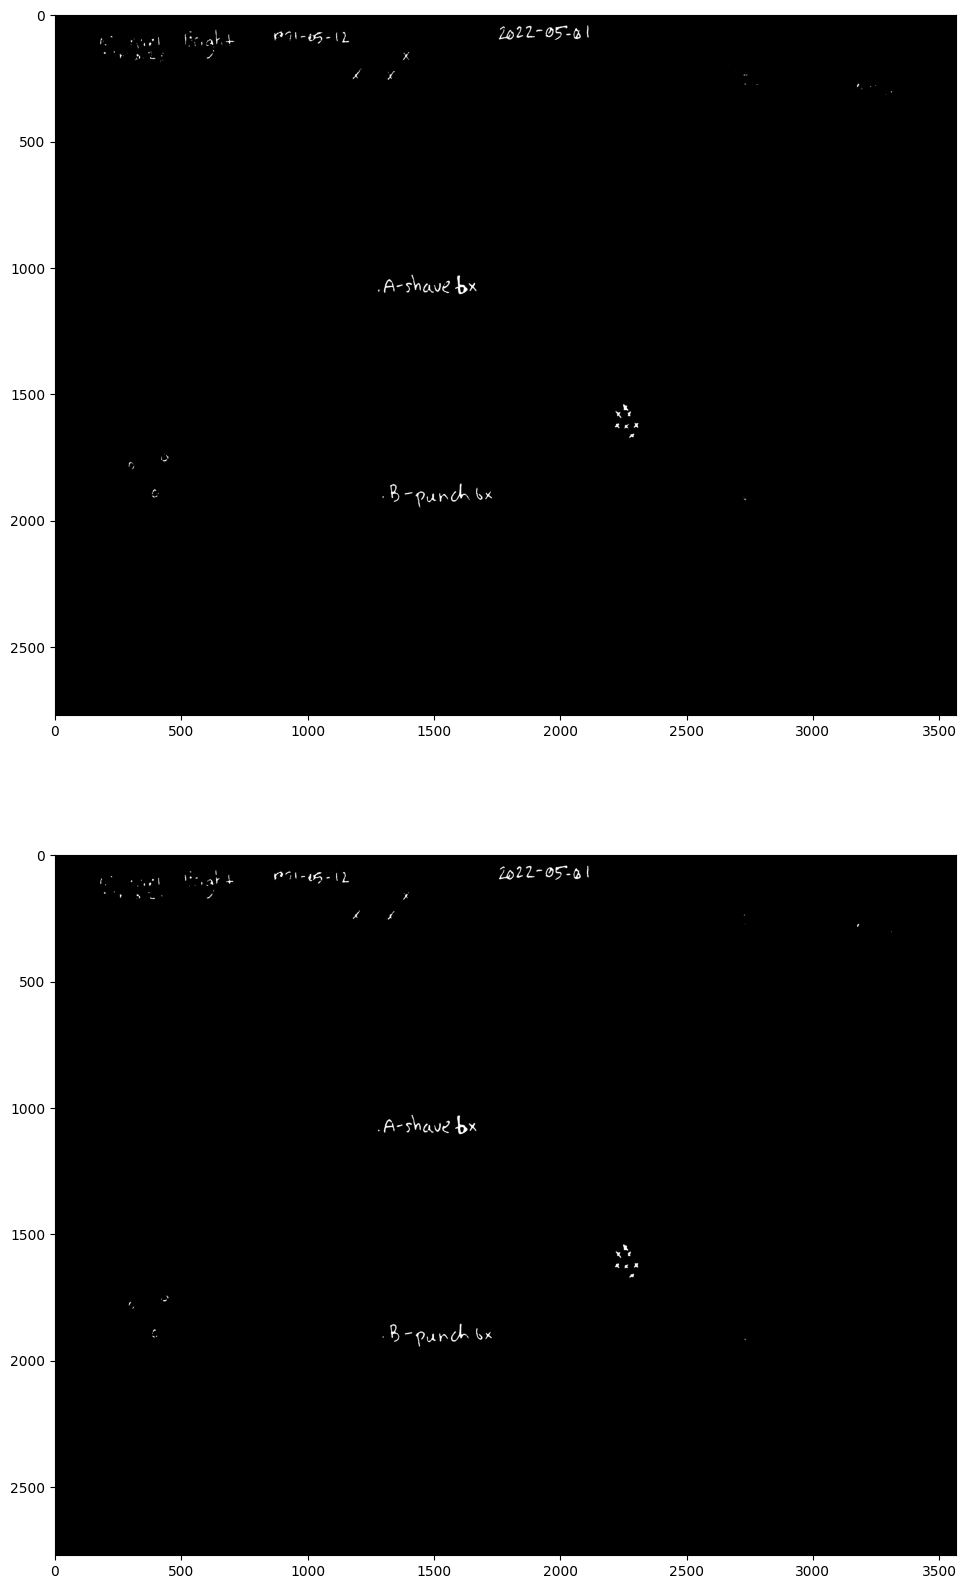

In [10]:
img_pth = "../data/cropped/IMG_9770.JPG"
img_bgr = cv2.imread(img_pth)
extracted_color = extract_color_using_dist(img_bgr, "blue")
blurred = cv2.medianBlur(extracted_color, 5)
fig, axes = plt.subplots(2, 1, figsize=(20, 20))
axes[0].imshow(extracted_color, cmap="gray")
axes[1].imshow(blurred, cmap="gray")